# **Vorbereitung**

In [9]:
# Import der Python Pakete
!pip install opencv
!pip install pillow
!pip install numpy
!pip install matplotlib

import os
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

/bin/bash: /home/lprasse/miniconda3/envs/jupyter/lib/python3.10/site-packages/cv2/../../../../lib/libtinfo.so.6: no version information available (required by /bin/bash)
ERROR: Could not find a version that satisfies the requirement opencv (from versions: none)
ERROR: No matching distribution found for opencv
/bin/bash: /home/lprasse/miniconda3/envs/jupyter/lib/python3.10/site-packages/cv2/../../../../lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/lprasse/miniconda3/envs/jupyter/lib/python3.10/site-packages/cv2/../../../../lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/lprasse/miniconda3/envs/jupyter/lib/python3.10/site-packages/cv2/../../../../lib/libtinfo.so.6: no version information available (required by /bin/bash)


# **1. Teil: Ein paar Basics**

### Ein Bild besteht gewöhnlich aus 3 Ebenen:  <font color='red'>Rot</font> - <font color='green'>Grün</font> - <font color='blue'>Blau</font>

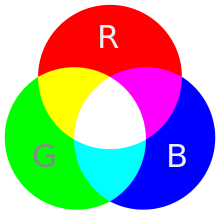



### Man kann Farben am Computer wiedergeben, indem man angibt, wie viel <font color='red'>rot</font>, <font color='green'>grün</font> und <font color='blue'>blau</font> sie enthalten sollen.

### Der Python Code sieht so aus:
### BILD = Image.new('RGB',(Breite,Höhe),(R,B,G))

### Die Werte der einzelnen Farben müssen zwischen 0 und 255 liegen.

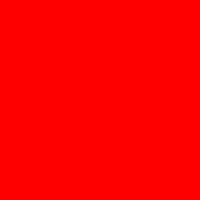

In [10]:
## Rot, Grün und Blau sind einfach zu erzeugen -> Rot
farbe_rot = Image.new('RGB',(200,200),(255,0,0))
display(farbe_rot)

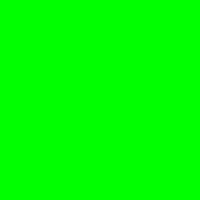

In [11]:
# Rot, Grün und Blau sind einfach zu erzeugen -> Grün
farbe_grün = Image.new('RGB',(200,200),(0,255,0))
display(farbe_grün)

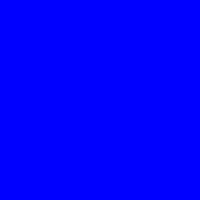

In [12]:
# Rot, Grün und Blau sind einfach zu erzeugen -> Blau
farbe_blau = Image.new('RGB',(200,200),(0,0,255))
display(farbe_blau)

Schwarz:


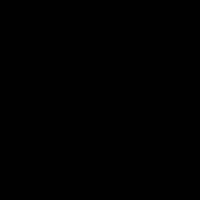

Weiß:


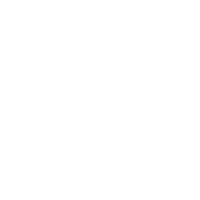

Lila:


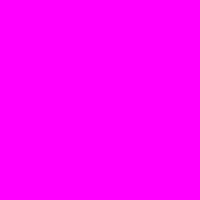

Grün:


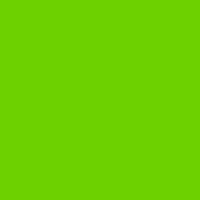

In [13]:
# Beispiel für andere Farben
print("Schwarz:")
farbe_schwarz = Image.new('RGB',(200,200),(0,0,0)) # keine Farben
display(farbe_schwarz)

print("Weiß:")
farbe_weiß = Image.new('RGB',(200,200),(255,255,255)) # alle Farben
display(farbe_weiß)

print("Lila:")
farbe_lila = Image.new('RGB',(200,200),(255,0,255)) # Rot und Blau
display(farbe_lila)

print("Grün:")
farbe_grün = Image.new('RGB',(200,200),(109,209,0)) # Grün mit Rot
display(farbe_grün)


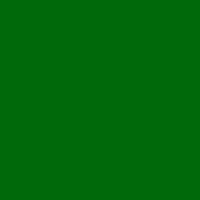

In [14]:
# Probiere aus, wie welche Farben gemischt werden können.
farb_experiment = Image.new('RGB',(200,200),(0,105,10)) 
display(farb_experiment)

#
#
#
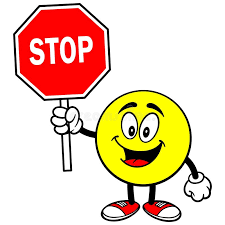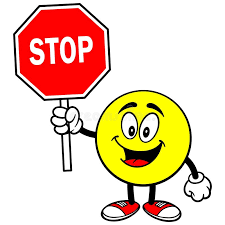
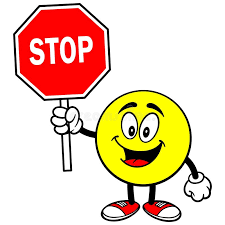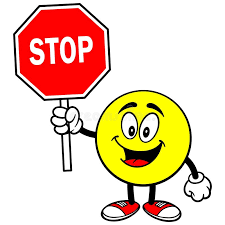

#
#
#

# **2. Teil: Pixel in echten Bildern**

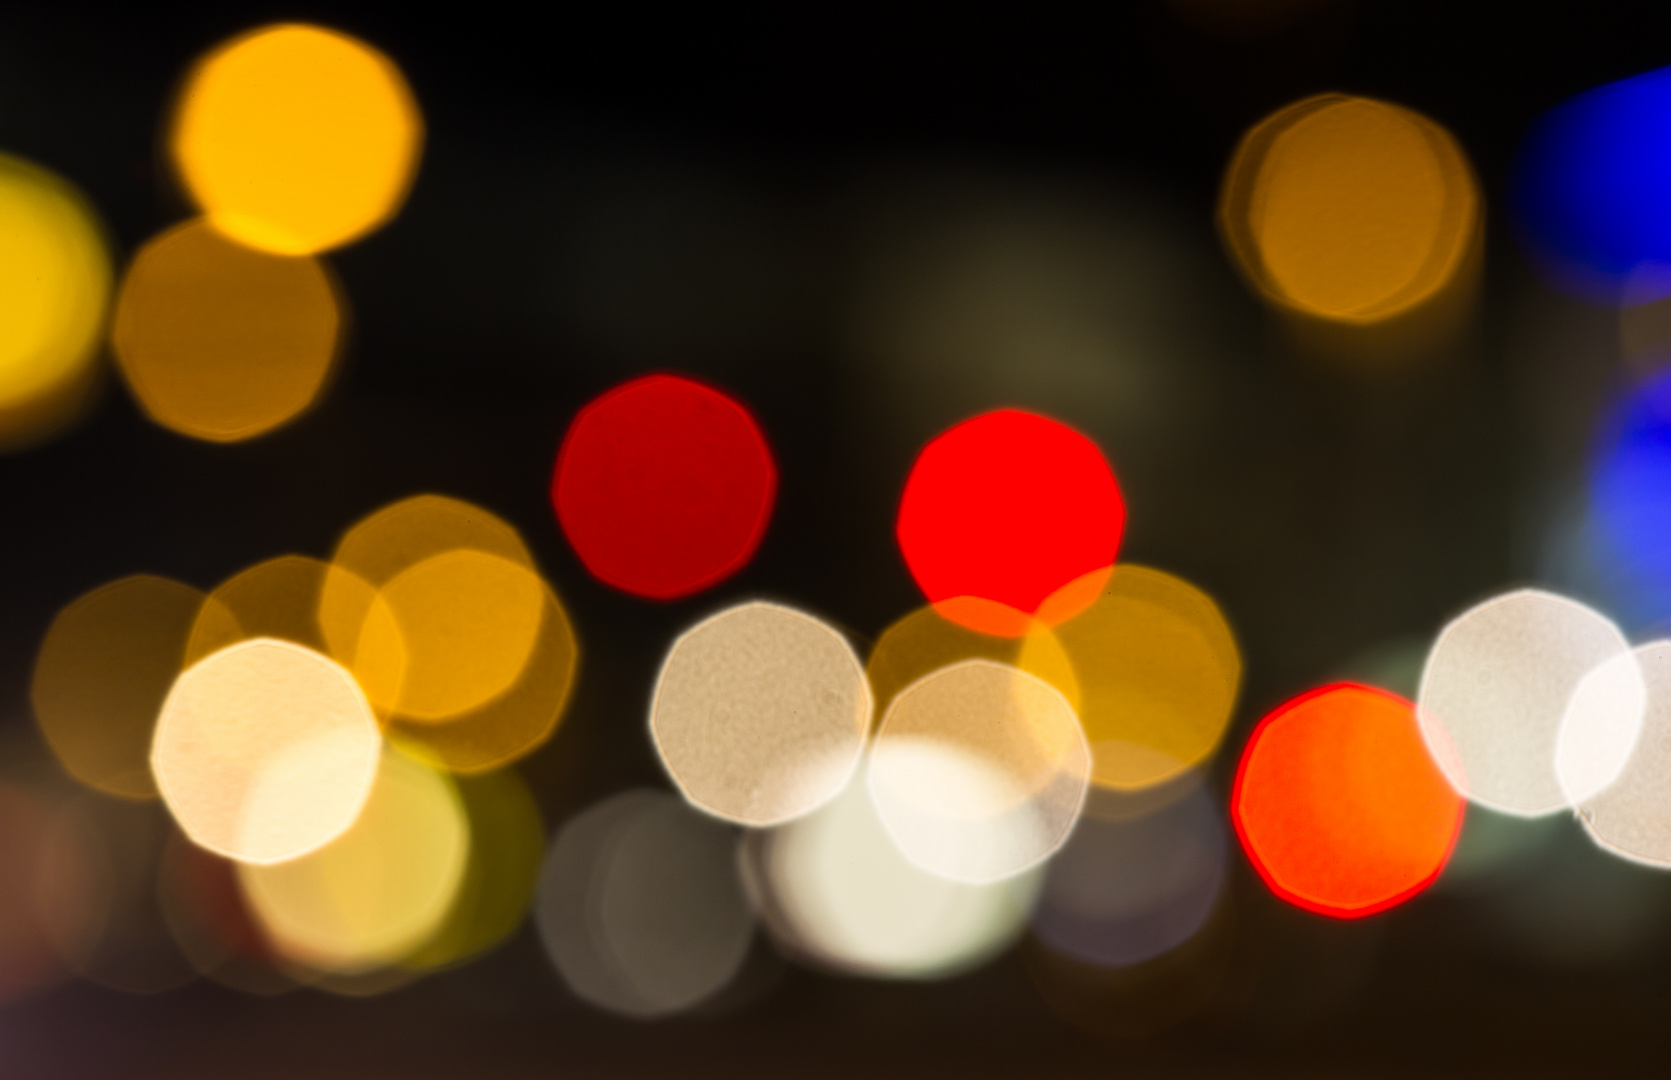

In [15]:
# Auswahl und Anzeigen des Bilds (Quelle: https://www.fotocommunity.de/photo/lichtpunkte-kmikka/33475018)
beispiel_1 = Image.open('Bilder/Beispiel.jpg')
display(beispiel_1)

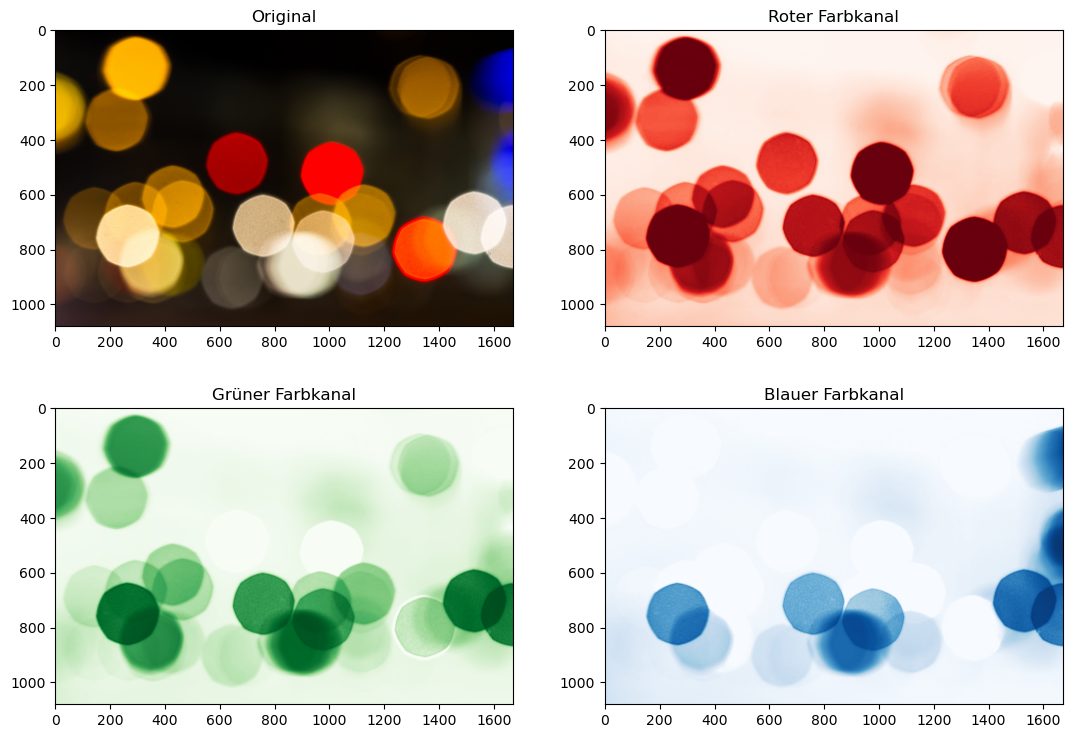

In [16]:
# Aufsplittung des Bildes in die 3 Ebenen
M = np.asarray(beispiel_1)

plt.figure(figsize=(13, 9))

plt.subplot(221)
plt.imshow(M[:, :, :], vmin=0, vmax=255)
plt.title("Original")

plt.subplot(222)
plt.imshow(M[:, :, 0], cmap='Reds', vmin=0, vmax=255)
plt.title("Roter Farbkanal")

plt.subplot(223)
plt.imshow(M[:, :, 1], cmap='Greens', vmin=0, vmax=255)
plt.title("Grüner Farbkanal")

plt.subplot(224)
plt.imshow(M[:, :, 2], cmap='Blues', vmin=0, vmax=255)
plt.title("Blauer Farbkanal")

plt.show()

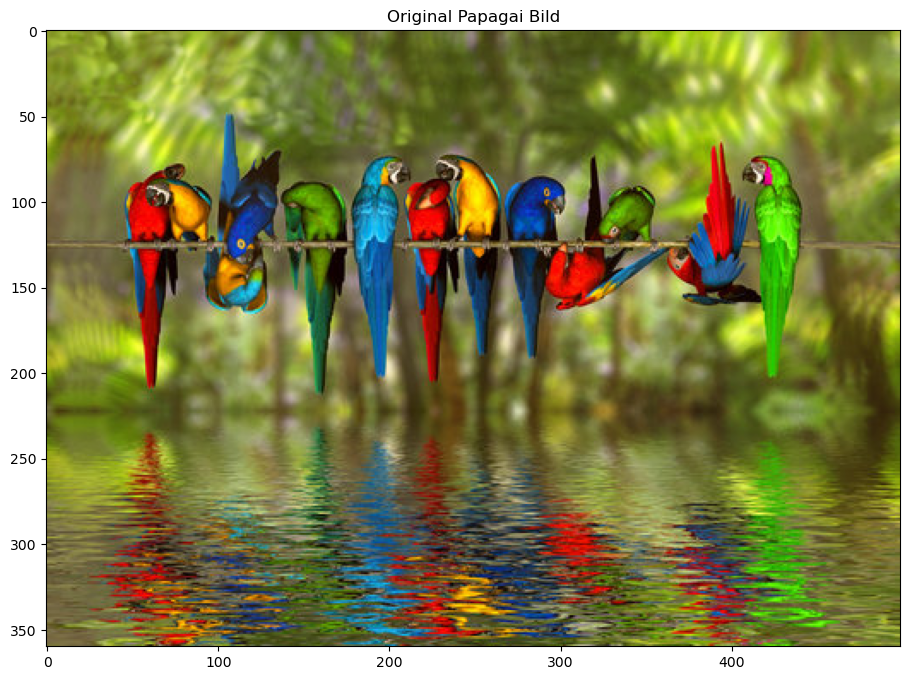

In [17]:
# Bild anzeigen (Quelle: https://stock.adobe.com/de/search?k=papagai&asset_id=114525884)

papagaien = Image.open('Bilder/papagai.jpg')

original_papagaien = np.asarray(papagaien)

plt.figure(figsize=(13,8))

plt.subplot(111)
plt.imshow(original_papagaien[:, :, :], vmin=0, vmax=255)
plt.title("Original Papagai Bild")

plt.show()

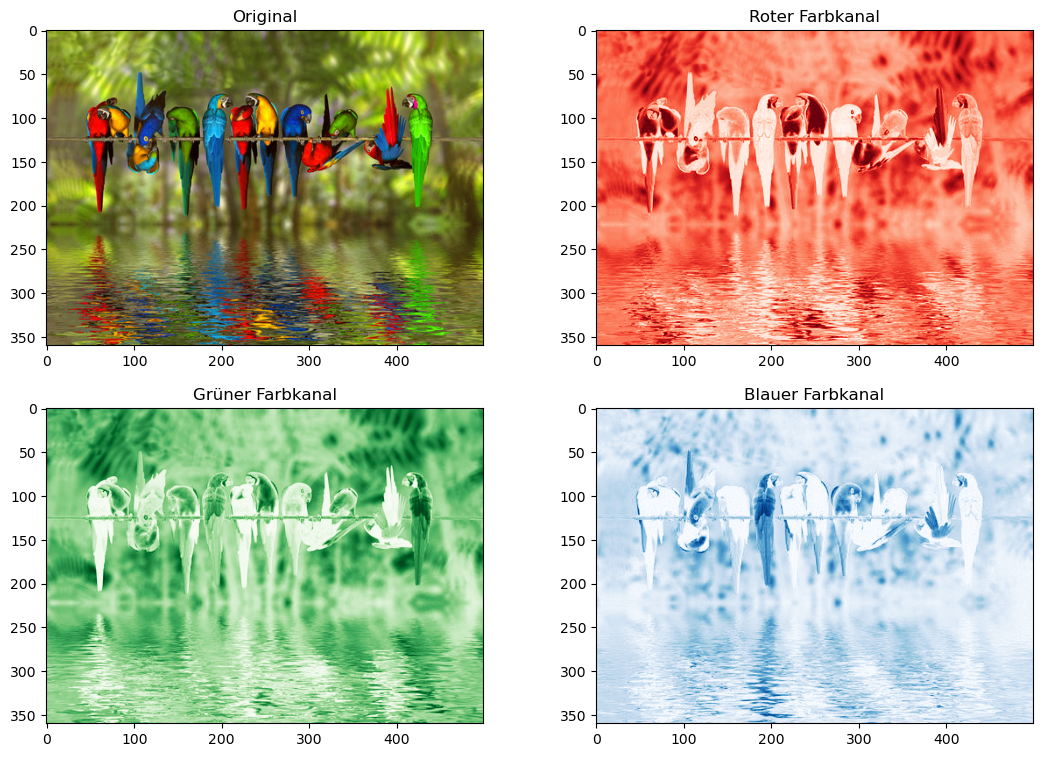

In [18]:
# Bild anzeigen

plt.figure(figsize=(13,9))

plt.subplot(2,2,1)
plt.imshow(original_papagaien[:, :, :], vmin=0, vmax=255)
plt.title("Original")

plt.subplot(222)
plt.imshow(original_papagaien[:, :, 0], cmap="Reds", vmin=0, vmax=255)
plt.title("Roter Farbkanal")

plt.subplot(223)
plt.imshow(original_papagaien[:, :, 1],cmap="Greens", vmin=0, vmax=255)
plt.title("Grüner Farbkanal")

plt.subplot(224)
plt.imshow(original_papagaien[:, :, 2],cmap="Blues", vmin=0, vmax=255)
plt.title("Blauer Farbkanal")

plt.show()

Pixel (120, 60) hat den RGB Farbzusammensetzung [230  16   5]


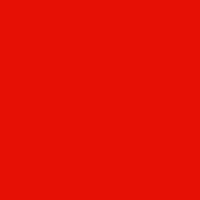

In [19]:
# Man kann auch für einzelne Pixel anschauen, welche Farbe sie haben
Pixel = (120,60)

pixel_farbe = original_papagaien[Pixel]

print("Pixel", Pixel, "hat den RGB Farbzusammensetzung", pixel_farbe)

display(Image.new('RGB',(200,200), tuple(pixel_farbe)))

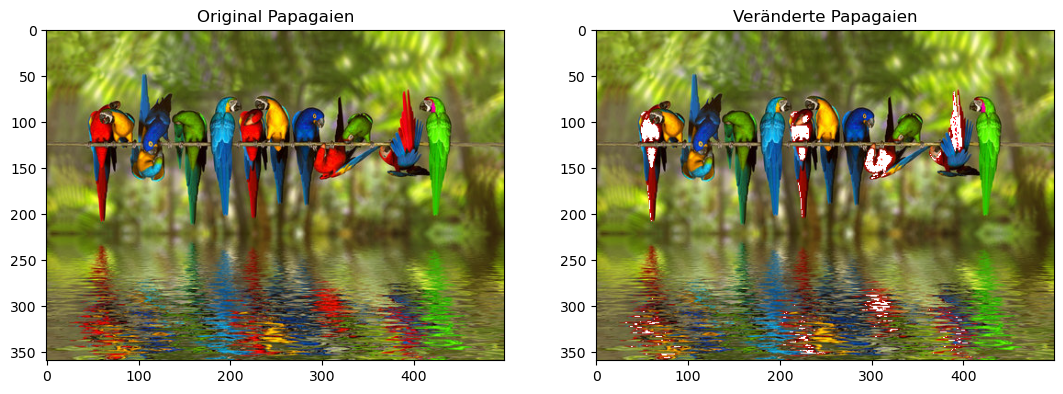

Wir haben die RGB Farbe [230, 16, 5] durch weiß ersetzt.


In [20]:
# Man kann Farben durch andere austauschen
# Wähle aus, welche Farbe du austauschen möchtest anhand eines Pixels

pixel_farbe = [230,16,5] # [R,G,B]  # SCHREIBE HIER DEINE RGB Farbe rein
Abweichung = 50 # DEFINIERE HIER, WIE ÄHNLICH PIXEL SEIN MÜSSEN. UM AUCH VERÄNDERT ZU WERDEN
# 0 = nur die definierte Farbe vs. 765 wenn alle Pixel verändert werden sollen

# Führe den Code aus und schaue dir das Ergebnis an
Reihen, Spalten, Farbkanäle = original_papagaien.shape
veränderte_papagaien = original_papagaien.copy()

delta = 0
for i in range(0,Reihen):
    for j in range(0,Spalten):
        delta = np.asarray(original_papagaien[i,j]) - np.asarray(pixel_farbe)
        if np.sum(abs(delta)) < Abweichung:                                            
            veränderte_papagaien[i,j] = [255,255,255]; # RGB
        else:  veränderte_papagaien[i,j] = original_papagaien[i,j]
            
plt.figure(figsize=(13, 6))

plt.subplot(121)
plt.imshow(original_papagaien[:, :, :], vmin=0, vmax=255)
plt.title("Original Papagaien")

plt.subplot(122)
plt.title("Veränderte Papagaien")
plt.imshow(veränderte_papagaien[:, :, :], vmin=0, vmax=255)
plt.show()

print("Wir haben die RGB Farbe", pixel_farbe, "durch weiß ersetzt.")

[154   9   4]


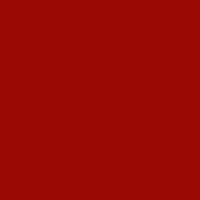

In [21]:
# Guck dir die Pixel an, die nicht verändert wurden. Was denkst du, was ist der Auslöser?
pixel_farbe = original_papagaien[170,60]
print(pixel_farbe)
display(Image.new('RGB',(200,200), tuple(pixel_farbe)))

#
#
#
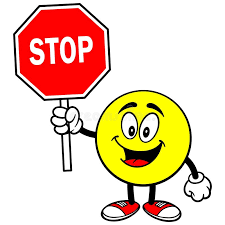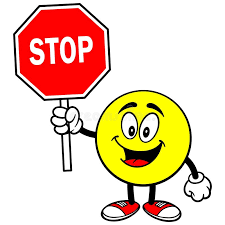
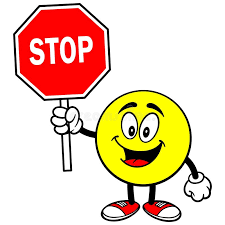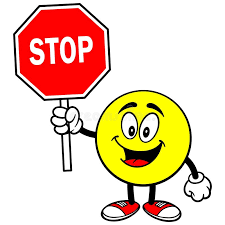

#
#
#

# **3.Teil: Bild Filter**

# Ab jetzt verändern wir das ganze Bild auf einmal!

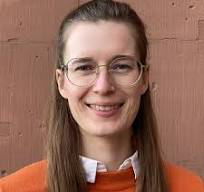

In [26]:
Katharina = Image.open('Bilder/Katharina.jpeg')
original_papagaien = np.asarray(Katharina)
display(Katharina)

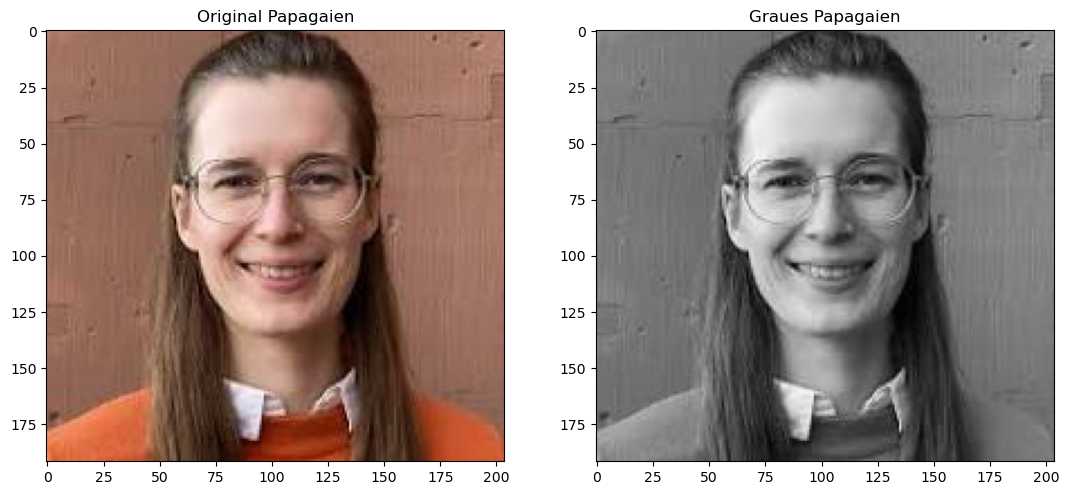

In [27]:
# Man kann farbige Bilder auch in graue Bilder umwandeln (Formal: Graues Bild = 0.299 ∙ Rot + 0.587 ∙ Grün + 0.114 ∙ Blau )

graue_papagaien = 0.299 * original_papagaien[:,:,0] + 0.587 * original_papagaien[:,:,1] + 0.114 * original_papagaien[:,:,2] 

# Ergebnis anzeigen lassen
plt.figure(figsize=(13, 6))

plt.subplot(121)
plt.imshow(original_papagaien, vmin=0, vmax=255)
plt.title("Original Papagaien")

plt.subplot(122)
plt.imshow(graue_papagaien, cmap="gray", vmin=0, vmax=255)
plt.title("Graues Papagaien")
plt.show()

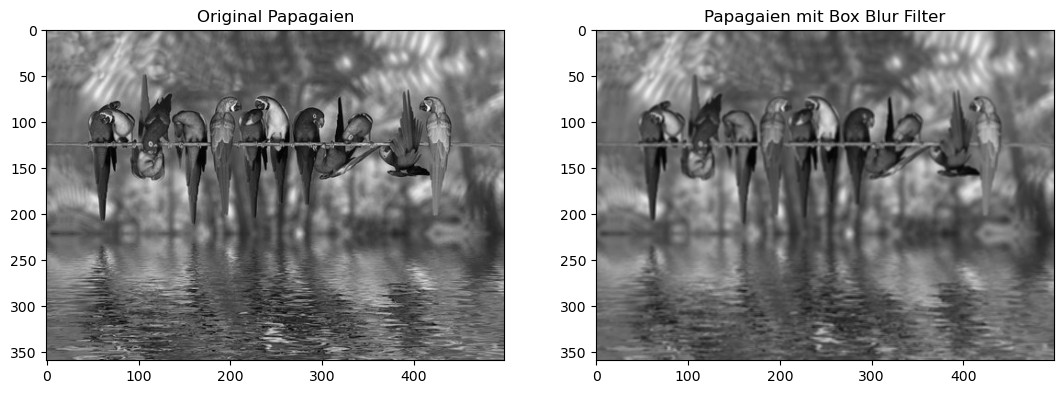

In [24]:
# Definiere den Filter
box_blur = np.array([[1, 1, 1], 
                     [1, 1, 1], 
                     [1, 1, 1]]) * 1/9

# Wende den Filter auf das Bild an
verschwommene_papagaien = graue_papagaien.copy()
verschwommene_papagaien = cv2.filter2D(verschwommene_papagaien, -1, box_blur)

# Schaue dir die Ergebnisse an
plt.figure(figsize=(13, 6))

plt.subplot(121)
plt.imshow(graue_papagaien, cmap="gray", vmin=0, vmax=255)
plt.title("Original Papagaien")

plt.subplot(122)
plt.imshow(verschwommene_papagaien, cmap="gray", vmin=0, vmax=255)
plt.title("Papagaien mit Box Blur Filter")
plt.show()

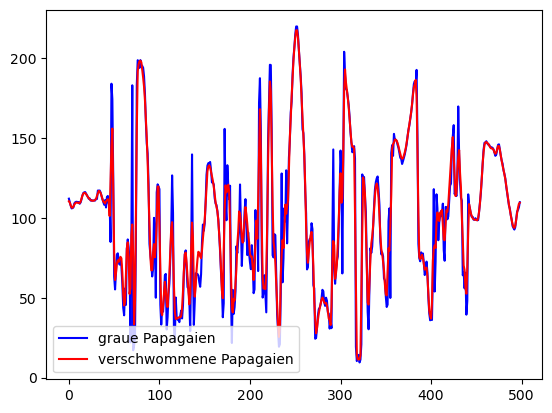

In [85]:
# Die Unterschiede zwischen den 2 Bildern kann man auch graphisch sehen

plt.plot(graues_bild[100,:], color = 'b', label="graue Papagaien")
plt.plot(verschwommene_papagaien[100,:], color = 'r', label="verschwommene Papagaien")

plt.legend()

plt.show()

Text(0.5, 1.0, 'Papagien mit Sharpening Filter')

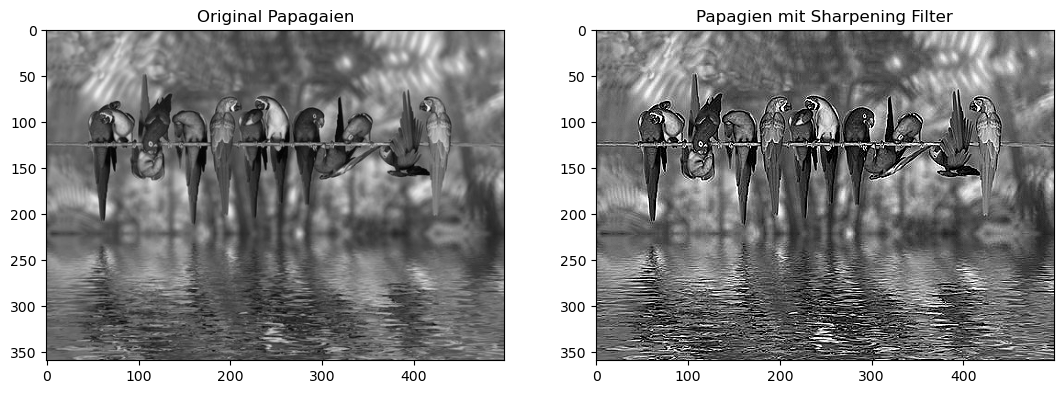

In [25]:
# Definiere den Filter
sharpening = np.array([[0, -1, 0], 
                     [-1, 5, -1], 
                     [0, -1, 0]]) 

# Wende den Filter auf das Bild an
geschärfte_papagaien = graue_papagaien.copy()
geschärfte_papagaien = cv2.filter2D(geschärfte_papagaien, -1, sharpening)

# Schaue dir die Ergebnisse an
plt.figure(figsize=(13, 6))

plt.subplot(121)
plt.imshow(graue_papagaien, cmap="gray", vmin=0, vmax=255)
plt.title("Original Papagaien")

plt.subplot(122)
plt.imshow(geschärfte_papagaien, cmap="gray", vmin=0, vmax=255)
plt.title("Papagien mit Sharpening Filter")

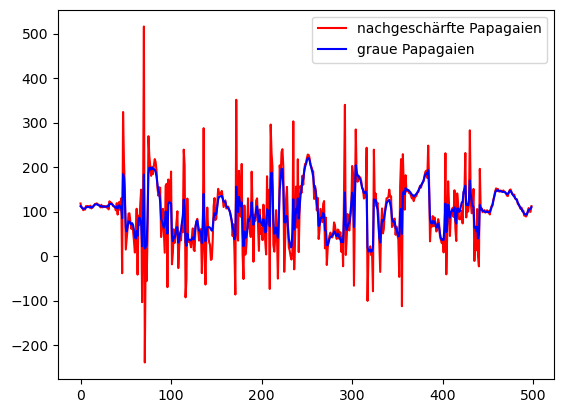

In [83]:
# Die Unterschiede zwischen den 2 Bildern kann man auch graphisch sehen
plt.plot(geschärfte_papagaien[100,:], color = 'r', label="nachgeschärfte Papagaien")
plt.plot(graue_papagaien[100,:], color = 'b', label="graue Papagaien")
plt.legend()
plt.show()

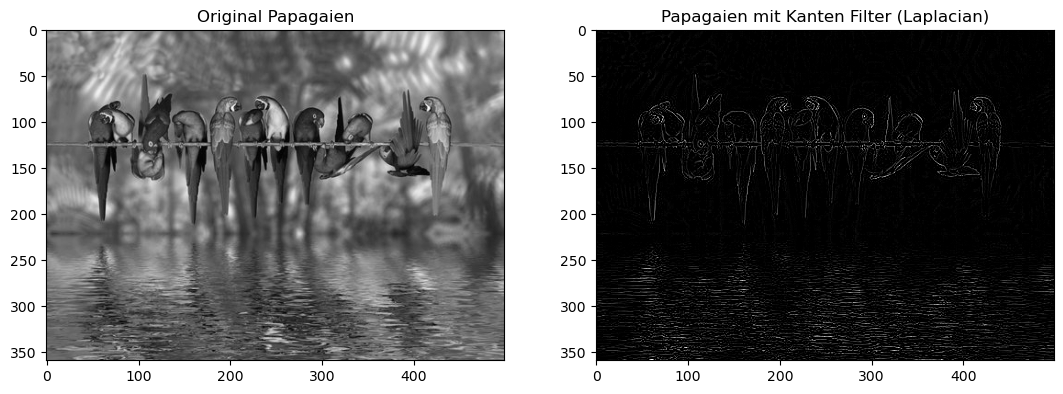

In [94]:
# Definiere den Filter
Kanten_filter = np.array([[0, 1, 0], 
                     [1, -4, 1], 
                     [0, 1, 0]]) 

# Wende den Filter auf das Bild an
umrisse_papagaien = graue_papagaien.copy()
umrisse_papagaien = cv2.filter2D(umrisse_papagaien, -1, Kanten_filter)

# Schaue dir die Ergebnisse an
plt.figure(figsize=(13, 6))

plt.subplot(121)
plt.imshow(graue_papagaien, cmap="gray", vmin=0, vmax=255)
plt.title("Original Papagaien")

plt.subplot(122)
plt.imshow(umrisse_papagaien, cmap="gray", vmin=0, vmax=255)
plt.title("Papagaien mit Kanten Filter (Laplacian)")
plt.show()

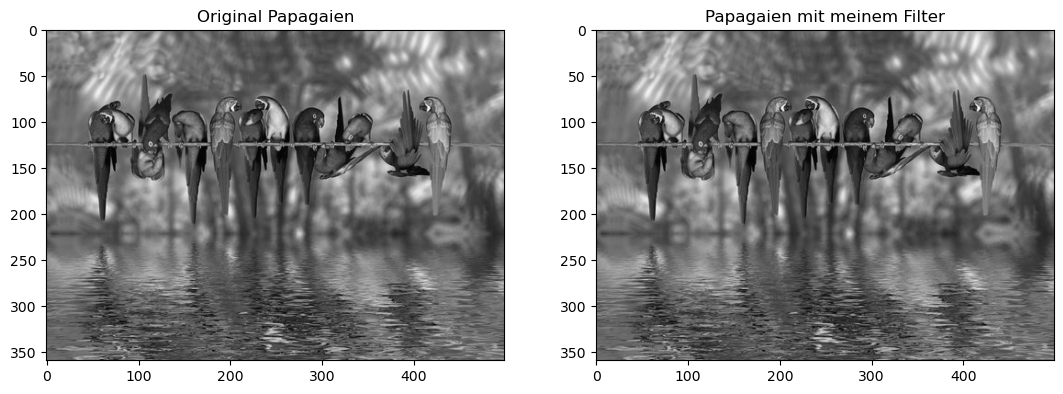

In [99]:
# Erkunde verschiedene Filter. Du darfst alle Zahlen verändern.
# Die einzige Regel ist, dass das Summe aller Filterwerte 1 ergeben muss.

mein_filter = np.array([[0, 0, 0], 
                     [0, 1, 0], 
                     [0, 0, 0]])

# Wende den Filter auf das Bild an
meine_papagaien = graue_papagaien.copy()
meine_papagaien = cv2.filter2D(meine_papagaien, -1, mein_filter)

# Schaue dir die Ergebnisse an
plt.figure(figsize=(13, 6))

plt.subplot(121)
plt.imshow(graue_papagaien, cmap="gray", vmin=0, vmax=255)
plt.title("Original Papagaien")

plt.subplot(122)
plt.imshow(meine_papagaien, cmap="gray", vmin=0, vmax=255)
plt.title("Papagaien mit meinem Filter")
plt.show()

#
#
#
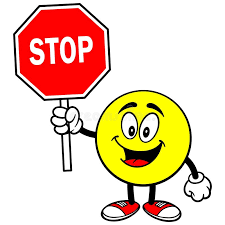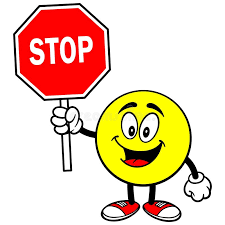
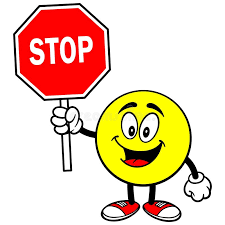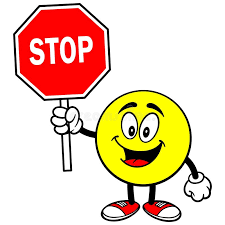

#
#
#

# **4. Teil: Bild Pyramiden**

In [107]:
# Vorbereitung

def pyr(BILD):
    BILD = np.asarray(BILD)
    lower = BILD.copy()
    Reihen, Spalten, Farbkanäle = BILD.shape

    # Gauß-Pyramiden erstellen
    gaussian_pyr = [lower]
    for i in range(6):
       lower = cv2.pyrDown(lower)
       gaussian_pyr.append(lower)

    laplace_pyr = [gaussian_pyr[5]]
    for i in range(5,0,-1):
        size = (gaussian_pyr[i - 1].shape[1], gaussian_pyr[i - 1].shape[0])
        GE = cv2.pyrUp(gaussian_pyr[i], dstsize=size)
        L = cv2.subtract(gaussian_pyr[i-1],GE)
        laplace_pyr.append(L)
    return laplace_pyr

def nebeneinander(PYR1, PYR2):
    LS = []
    for la,lb in zip(PYR1,PYR2):
        rows,cols,dpt = la.shape
        ls = np.hstack((la[:,0:cols//2], lb[:,cols//2:]))
        LS.append(ls)
    
    BILD = LS[0]
    for i in range(1,6):
        size = (LS[i].shape[1], LS[i].shape[0])
        BILD = cv2.pyrUp(BILD,dstsize=size)
        BILD = cv2.add(BILD, LS[i])
    return BILD


def übereinander(PYR1, PYR2):
    LS = []
    Level = 0
    for la,lb in zip(PYR1,PYR2):
        rows,cols,dpt = la.shape
        if Level < 5:
            LS.append(la)
        else:
            ls = np.hstack((la[:,0:cols//2], lb[:,cols//2:]))
            LS.append(lb)
        Level += 1
    
    # now build a 
    BILD = LS[0]
    print(type(LS[0]))
    for i in range(1,6):
        size = (LS[i].shape[1], LS[i].shape[0])
        BILD = cv2.pyrUp(BILD,dstsize=size)
        BILD = cv2.add(BILD, LS[i])
    return BILD



(192, 204, 3) (192, 204, 3)


Text(0.5, 1.0, 'Katharina Katze')

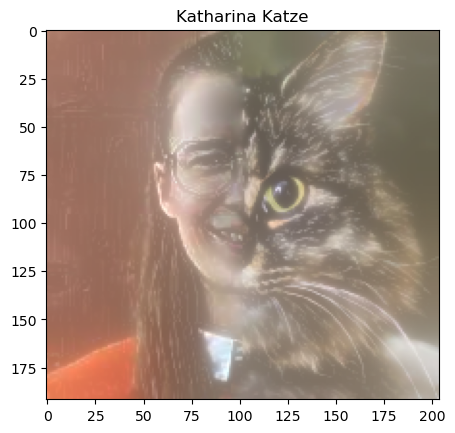

In [108]:
# Lade 2 Bilder die genau gleich groß sind.

Katharina = np.asarray(Image.open("Bilder/Katharina.jpeg"))
Katze = np.asarray(Image.open("Bilder/Katze.png"))
Katze = Katze[6:-6,1:]
print(Katharina.shape, Katze.shape)

# Bereite die Bilder vor
Katharina_pyr = pyr(Katharina)
Katze_pyr = pyr(Katze)

# Kombiniere die Bilder
Katharina_Katze = nebeneinander(Katharina_pyr,Katze_pyr)


# Zeige das Ergebnis an
plt.plot()
plt.imshow(Katharina_Katze, vmin=0, vmax=255)
plt.title("Katharina Katze")

<class 'numpy.ndarray'>


Text(0.5, 1.0, 'Katzige Katharina')

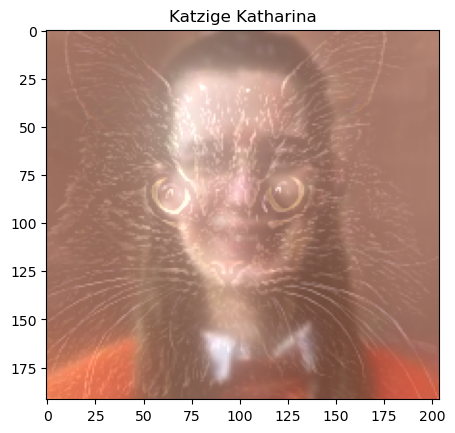

In [106]:
# Oder übereinander
Katharina_Katze2 = übereinander(Katharina_pyr,Katze_pyr)

# Zeige das Ergebnis an
plt.plot()
plt.imshow(Katharina_Katze2, vmin=0, vmax=255)
plt.title("Katzige Katharina")

# Um schönere Bilder zu bekommen, müssen die Gesichter ungefähr auf der gleichen Höhe sein.

In [109]:
# Schneide das Bild aus.
# bild1 = bild.crop((links, open, rechts, unten)) # Wie Koordinaten

# Veränder die Größe des Bilds
#bild2 = bild.resize((Höhe, Breite))